https://en.wikipedia.org/wiki/Iris_flower_data_set

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png

In [1]:
# pandas and numpy
import pandas as pd
import numpy as np

# useful reports
from pandas_profiling import ProfileReport

# plotting
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# models
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Importing and getting info about the data:

In [2]:
data = "../data/iris.csv"

In [3]:
iris_df = pd.read_csv(data)

Knowing the data:

In [4]:
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.tail()

,sepal-length,sepal-width,petal-length,petal-width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Pandas-profiling repo: https://github.com/pandas-profiling/pandas-profiling

In [8]:
profile = ProfileReport(iris_df, title='Pandas Profiling Report', explorative=True)

In [9]:
profile

In [10]:
profile.to_file("iris_report.html")

Profile clearly shows that "species" is categorical.

In [11]:
iris_df.groupby("species").count()

,sepal-length,sepal-width,petal-length,petal-width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [12]:
iris_df.groupby("species").size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Plots

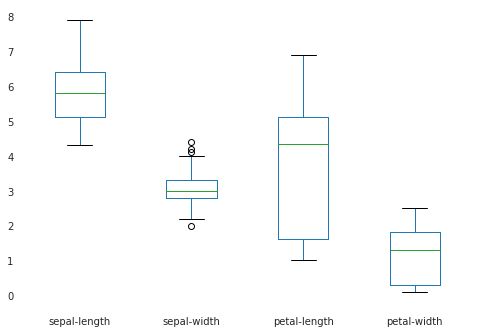

In [13]:
iris_df.plot(kind='box');

Improving plots with seaborn:

In [14]:
sns.set(style="white", color_codes=True)

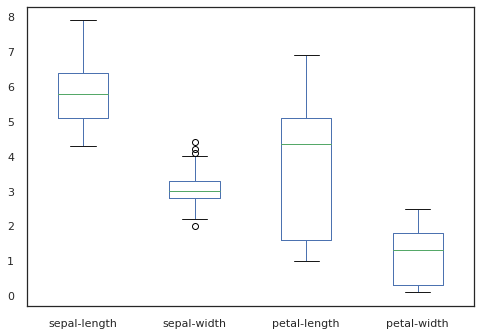

In [15]:
iris_df.plot(kind='box')

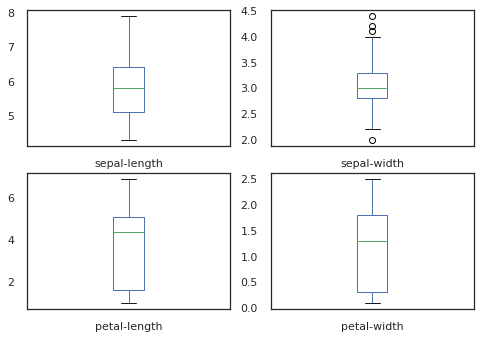

In [16]:
iris_df.plot(kind='box', subplots=True, layout=(2, 2));

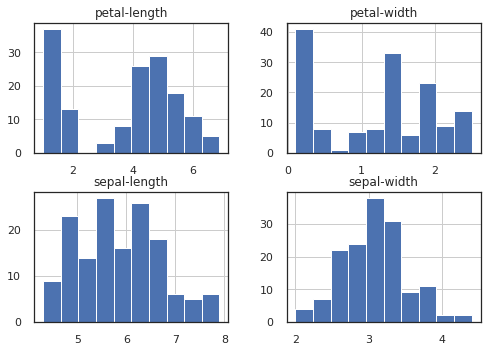

In [17]:
iris_df.hist();

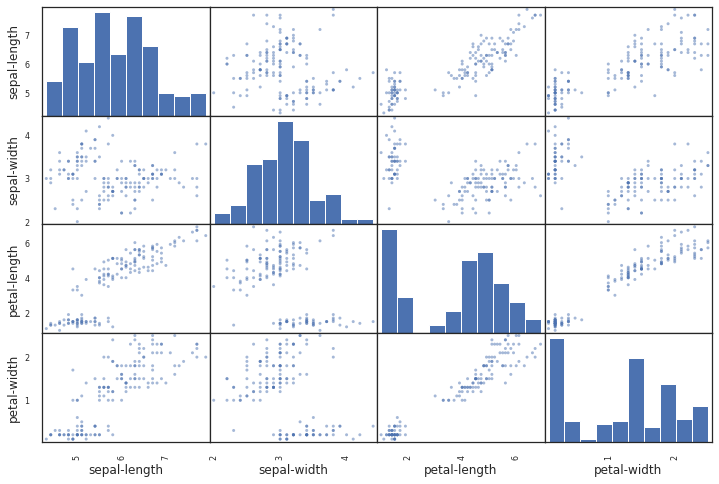

In [18]:
scatter_matrix(iris_df, figsize=(12, 8));

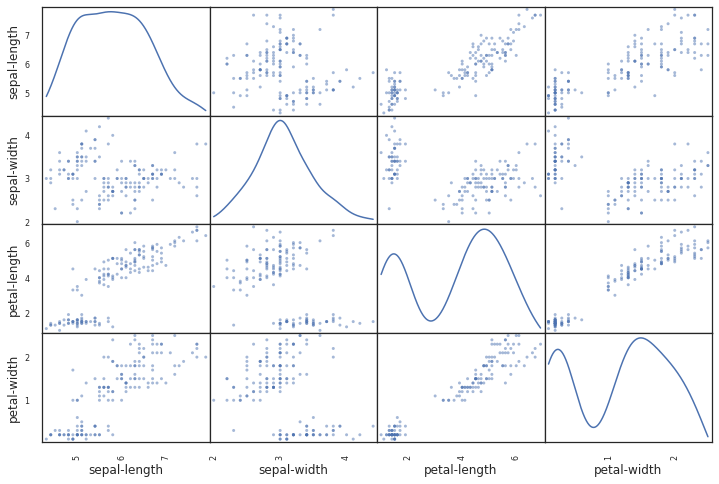

In [19]:
scatter_matrix(iris_df, figsize=(12, 8), diagonal='kde');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


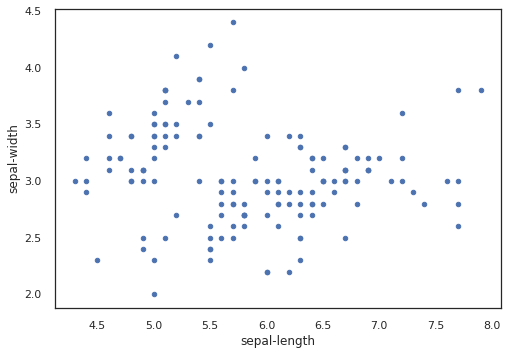

In [20]:
iris_df.plot(kind="scatter", x="sepal-length", y="sepal-width");

Let's get rid of the warning and color the plot:

In [21]:
cmap = plt.get_cmap('rainbow_r')

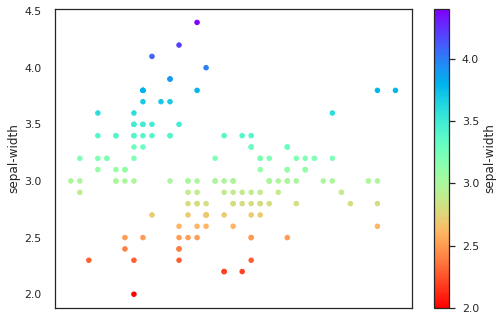

In [22]:
iris_df.plot(kind="scatter", x="sepal-length", y="sepal-width", c="sepal-width", colormap=cmap);

More about colormaps:

https://seaborn.pydata.org/tutorial/color_palettes.html

https://matplotlib.org/tutorials/colors/colormaps.html

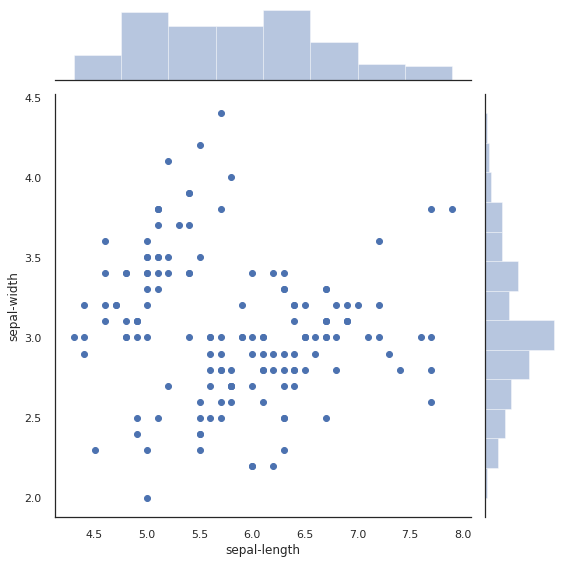

In [23]:
sns.jointplot(x="sepal-length", y="sepal-width", data=iris_df, height=8);

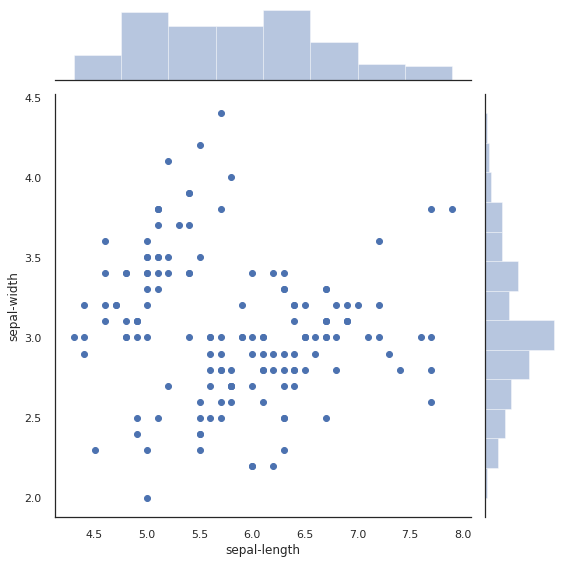

In [24]:
sns.jointplot(x="sepal-length", y="sepal-width", data=iris_df, height=8);

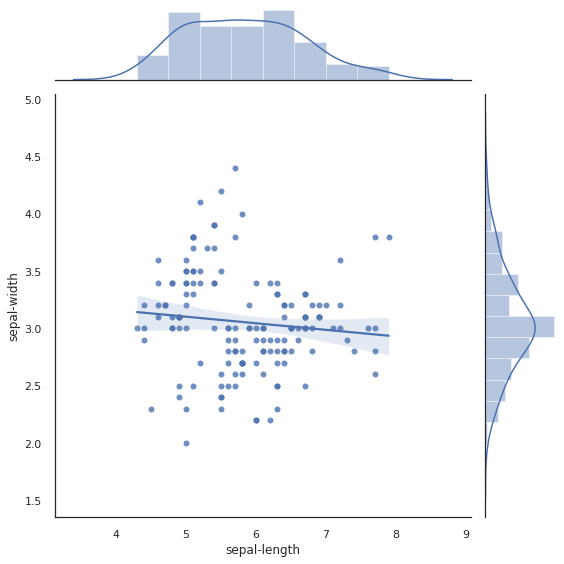

In [25]:
sns.jointplot(x="sepal-length", y="sepal-width", data=iris_df, height=8, kind='reg');

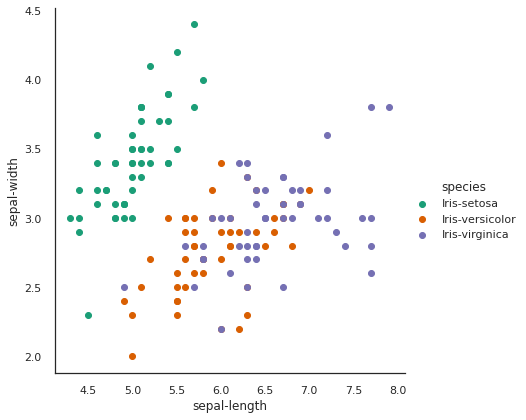

In [26]:
g = sns.FacetGrid(iris_df, hue='species', palette='Dark2', height=6)
g.map(plt.scatter, 'sepal-length', 'sepal-width').add_legend();

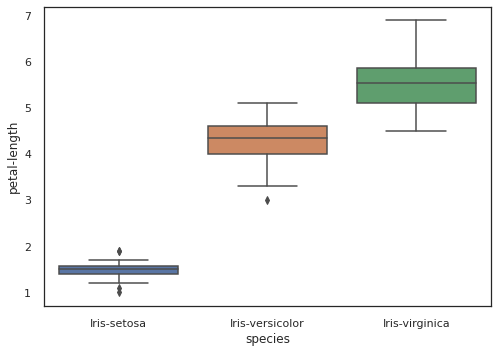

In [27]:
sns.boxplot(x="species", y="petal-length", data=iris_df);

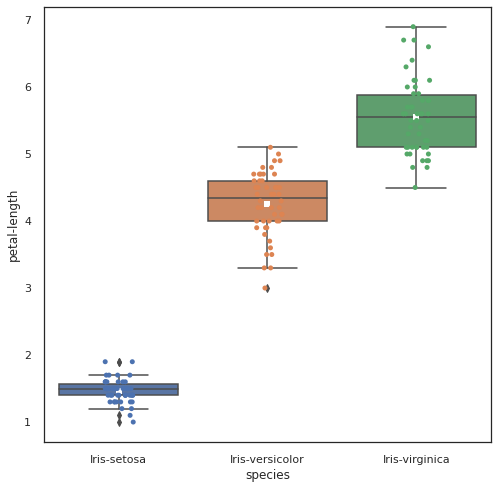

In [28]:
ax = sns.boxplot(x="species", y="petal-length", data=iris_df, showmeans=True, 
                 meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
ax = sns.stripplot(x="species", y="petal-length", data=iris_df)
ax.figure.set_size_inches(8, 8)

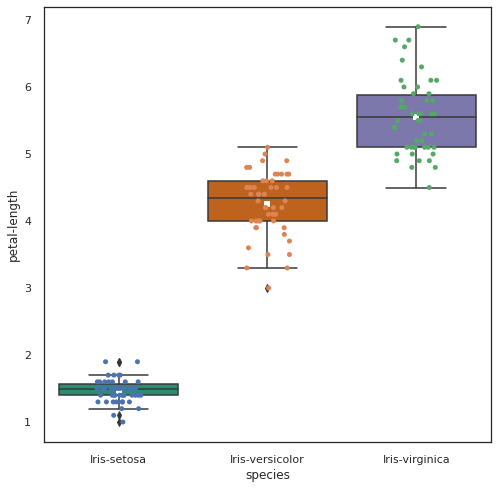

In [29]:
ax = sns.boxplot(x="species", y="petal-length", data=iris_df, showmeans=True, palette='Dark2',
                 meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
ax = sns.stripplot(x="species", y="petal-length", data=iris_df, jitter=0.15)
ax.figure.set_size_inches(8, 8)

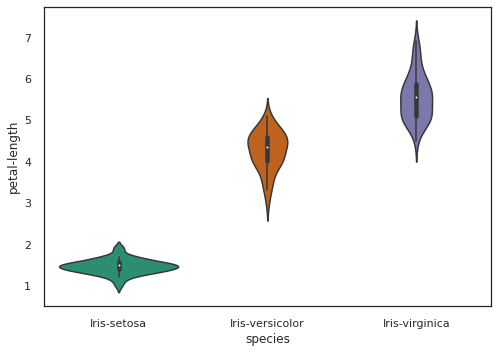

In [30]:
sns.violinplot(x="species", y="petal-length", data=iris_df, palette='Dark2');

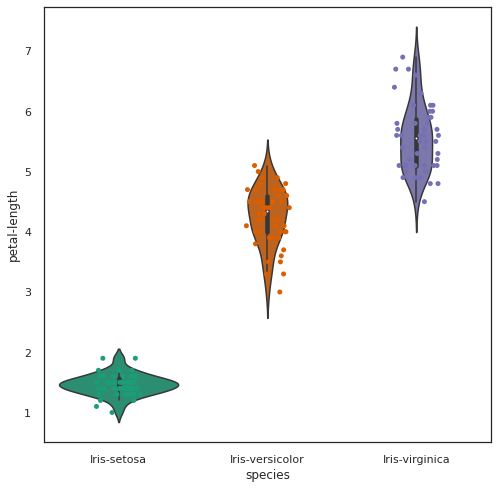

In [31]:
ax = sns.violinplot(x="species", y="petal-length", data=iris_df, palette='Dark2')
ax = sns.stripplot(x="species", y="petal-length", data=iris_df, jitter=0.15, palette='Dark2')
ax.figure.set_size_inches(8, 8)

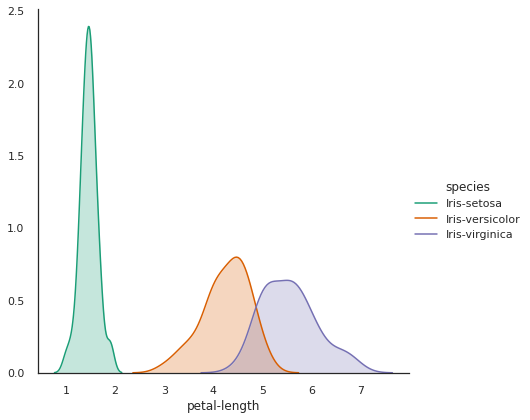

In [32]:
g = sns.FacetGrid(iris_df, hue="species", height=6, palette='Dark2')
g.map(sns.kdeplot, "petal-length", shade=True).add_legend();

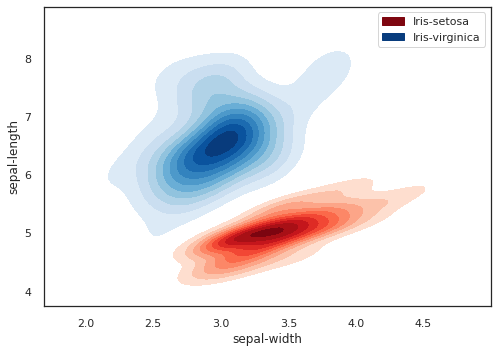

In [33]:
setosa = iris_df.loc[iris_df["species"] == "Iris-setosa"]
virginica = iris_df.loc[iris_df["species"] == "Iris-virginica"]
ax = sns.kdeplot(setosa["sepal-width"], setosa["sepal-length"],
                 cmap="Reds", shade=True, shade_lowest=False, label="Iris-setosa")
ax = sns.kdeplot(virginica["sepal-width"], virginica["sepal-length"],
                 cmap="Blues", shade=True, shade_lowest=False, label="Iris-virginica")
ax.legend()

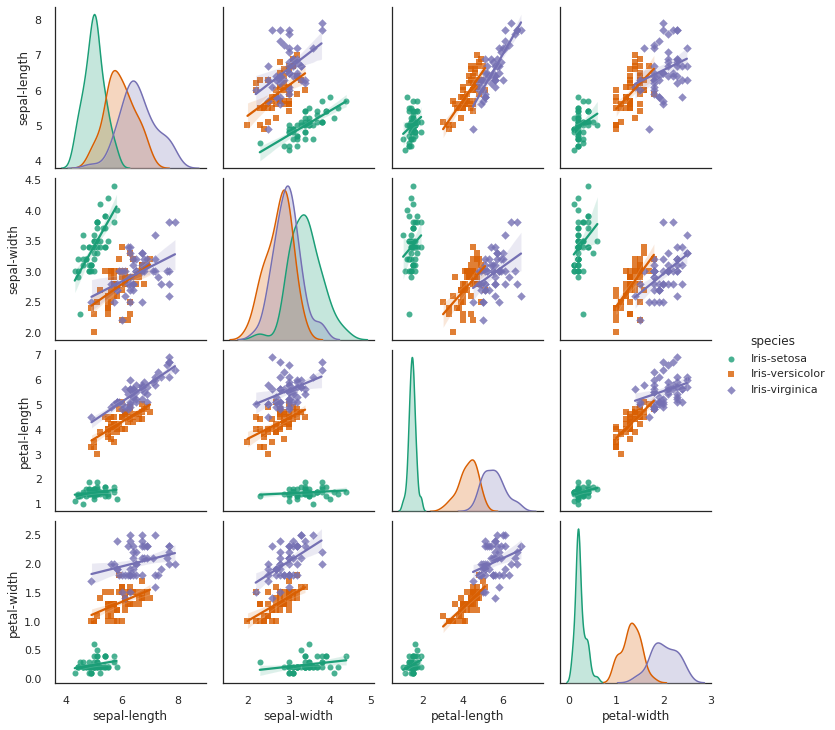

In [34]:
sns.pairplot(iris_df, hue="species", 
             markers=["o", "s", "D"], palette='Dark2',
            kind="reg");

# Machine learning

## Iris-setosa

In [35]:
iris_values = iris_df.values

In [36]:
type(iris_values)

numpy.ndarray

In [37]:
iris_values.shape

(150, 5)

In [38]:
iris_values[:6]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa']], dtype=object)

In [39]:
target_setosa = iris_values[:, 4]
target_setosa[40:60]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [40]:
setosa_values = np.where(target_setosa == 'Iris-setosa', 1, 0)
setosa_values[:6]

array([1, 1, 1, 1, 1, 1])

In [41]:
setosa_values.shape

(150,)

In [42]:
X = iris_values[:, 0:4]

In [43]:
X.shape

(150, 4)

In [44]:
test_size = 0.20
seed = 7

In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    setosa_values, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

In [46]:
print("X train:")
print("shape:", X_train.shape)
print("Head:", X_train[:10])

X train:
shape: (120, 4)
Head: [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1.0]
 [4.6 3.6 1.0 0.2]
 [6.9 3.1 5.4 2.1]
 [6.4 2.9 4.3 1.3]
 [4.8 3.0 1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.5 1.4 0.3]
 [7.1 3.0 5.9 2.1]]


In [47]:
print("X test:")
print("shape:", X_test.shape)
print("Head:", X_test[:10])

X test:
shape: (30, 4)
Head: [[5.9 3.0 5.1 1.8]
 [5.4 3.0 4.5 1.5]
 [5.0 3.5 1.3 0.3]
 [5.6 3.0 4.5 1.5]
 [4.9 2.5 4.5 1.7]
 [4.5 2.3 1.3 0.3]
 [6.9 3.1 4.9 1.5]
 [5.6 2.7 4.2 1.3]
 [4.8 3.4 1.6 0.2]
 [6.4 3.2 4.5 1.5]]


In [48]:
print("Y train:")
print("shape:", y_train.shape)
print("Head:", y_train[:10])

Y train:
shape: (120,)
Head: [0 0 1 0 0 1 1 1 1 0]


In [49]:
print("Y test:")
print("shape:", y_test.shape)
print("Head:", y_test[:10])

Y test:
shape: (30,)
Head: [0 0 1 0 0 1 0 0 1 0]


By definition a confusion matrix `C` is such that `C_{i, j}` is equal to the number of observations known to be in group `i` and predicted to be in group `j`. Thus in binary classification, the count of true negatives is`C_{0,0}`, false negatives is `C_{1,0}`, true positives is `C_{1,1}` and false positives is `C_{0,1}`.

https://en.wikipedia.org/wiki/Confusion_matrix

![confusion_matrix](../files/confusion_matrix.png)

Scikit-learn order may be confusing: https://stackoverflow.com/questions/35178590/scikit-learn-confusion-matrix

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cm

array([[ 7,  0],
       [ 0, 23]])

In [51]:
TP = cm[0][0]
FN = cm[0][1]  # Type 2 error
FP = cm[1][0]  # Type 1 error
TN = cm[1][1]

TP, FN, FP, TN

(7, 0, 0, 23)

In [52]:
print(y_test)
print(y_pred)

[0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]


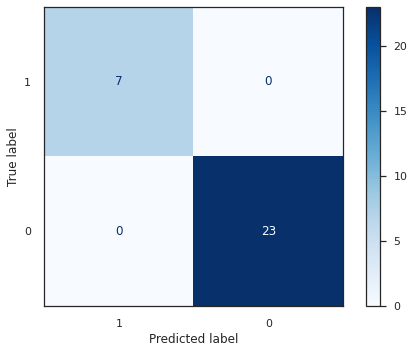

In [53]:
plot_confusion_matrix(model, X_test, y_test, cmap="Blues", labels=[1, 0])

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

$$
\text{F-measure} = \frac{2 \times \text{Recall} \times \text{Precision}}{\text{Recall} + \text{Precision}}
$$

Macro average is the average of precision/recall/f1-score.

Weighted average is just the weighted average of precision/recall/f1-score.

 

In [54]:
accuracy_score(y_test, y_pred) 

1.0

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- True Positive (TP)

    - The predicted value matches the actual value
    - The actual value was positive and the model predicted a positive value


- True Negative (TN) 

    - The predicted value matches the actual value
    - The actual value was negative and the model predicted a negative value


- False Positive (FP) – Type 1 error

    - The predicted value was falsely predicted
    - The actual value was negative but the model predicted a positive value
    - Also known as the Type 1 error
    
    
- False Negative (FN) – Type 2 error

    - The predicted value was falsely predicted
    - The actual value was positive but the model predicted a negative value
    - Also known as the Type 2 error

**Precision** tells us how many of the correctly predicted cases actually turned out to be positive.

**Recall** tells us how many of the actual positive cases we were able to predict correctly with our model.

Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.

Recall is a useful metric in cases where False Negative trumps False Positive.

F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.

## Iris-virginica

In [56]:
target_virginica = iris_values[:, 4]
virginica_values = np.where(target_virginica == 'Iris-virginica', 1, 0)

virginica_values[90:110]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
X = iris_values[:, 0:4]
test_size = 0.20
seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    virginica_values, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cm

array([[ 9,  2],
       [ 2, 17]])

In [58]:
TP = cm[0][0]
FN = cm[0][1]  # Type 2 error
FP = cm[1][0]  # Type 1 error
TN = cm[1][1]

TP, FN, FP, TN

(9, 2, 2, 17)

In [59]:
print(y_test)
print(y_pred)

[1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1]
[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1]


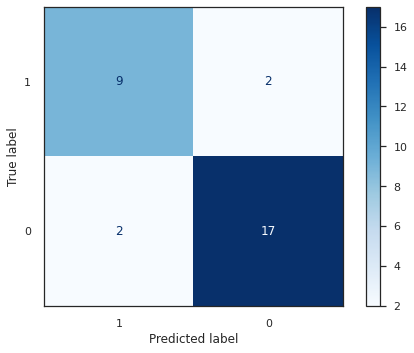

In [60]:
plot_confusion_matrix(model, X_test, y_test, cmap="Blues", labels=[1, 0])

In [61]:
accuracy_score(y_test, y_pred) 

0.8666666666666667

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



## Iris-versicolor

In [63]:
target_versicolor = iris_values[:, 4]
versicolor_values = np.where(target_versicolor == 'Iris-versicolor', 1, 0)

virginica_values[90:110]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
X = iris_values[:, 0:4]
test_size = 0.20
seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    versicolor_values, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cm

array([[ 3,  9],
       [ 4, 14]])

In [65]:
TP = cm[0][0]
FN = cm[0][1]  # Type 2 error
FP = cm[1][0]  # Type 1 error
TN = cm[1][1]

TP, FN, FP, TN

(3, 9, 4, 14)

In [66]:
print(y_test)
print(y_pred)

[0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0]
[0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0]


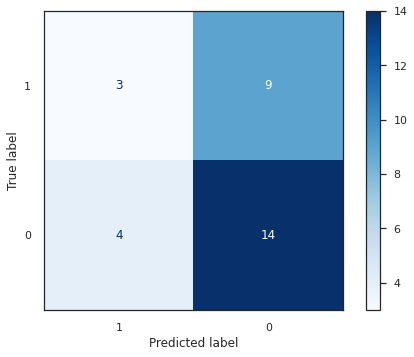

In [67]:
plot_confusion_matrix(model, X_test, y_test, cmap="Blues", labels=[1, 0])

In [68]:
accuracy_score(y_test, y_pred) 

0.5666666666666667

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.78      0.68        18
           1       0.43      0.25      0.32        12

    accuracy                           0.57        30
   macro avg       0.52      0.51      0.50        30
weighted avg       0.54      0.57      0.54        30



Changing the model.

https://scikit-learn.org/stable/modules/neighbors.html#neighbors

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [70]:
model = KNeighborsClassifier(n_neighbors=15, weights='distance')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test, labels=[1, 0])
cm

array([[10,  1],
       [ 2, 17]])

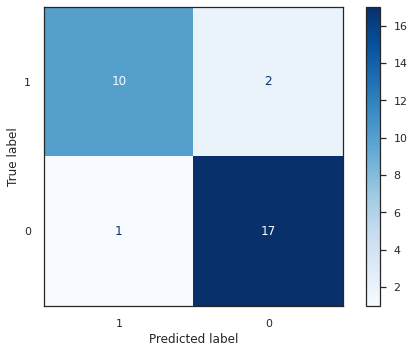

In [71]:
plot_confusion_matrix(model, X_test, y_test, cmap="Blues", labels=[1, 0])

In [72]:
accuracy_score(y_test, y_pred) 

0.9

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



Removing setosa category and trying a linear model again:

In [74]:
no_setosa = iris_values[iris_values[:,4]!='Iris-setosa']
no_setosa.shape

(100, 5)

Bigger training set since less data:

In [75]:
X = no_setosa[:, 0:4]
target_versicolor = no_setosa[:, 4]
versicolor_values = np.where(target_versicolor == 'Iris-versicolor', 1, 0)

test_size = 0.30
seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    versicolor_values, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cm

array([[15,  1],
       [ 0, 14]])

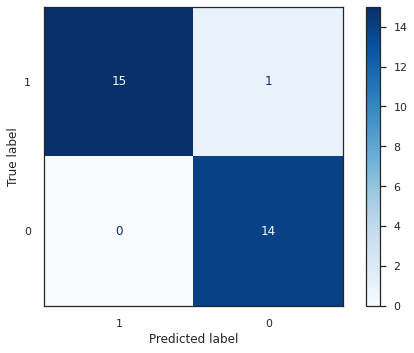

In [76]:
plot_confusion_matrix(model, X_test, y_test, cmap="Blues", labels=[1, 0])

In [77]:
accuracy_score(y_test, y_pred) 

0.9666666666666667

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Trying another non-linear model:

https://en.wikipedia.org/wiki/Support_vector_machine

https://en.wikipedia.org/wiki/Support_vector_machine#Support-vector_clustering_(SVC)

In [79]:
target_versicolor = iris_values[:, 4]
versicolor_values = np.where(target_versicolor == 'Iris-versicolor', 1, 0)

In [80]:
X = iris_values[:, 0:4]
test_size = 0.20
seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    versicolor_values, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cm

array([[11,  1],
       [ 3, 15]])

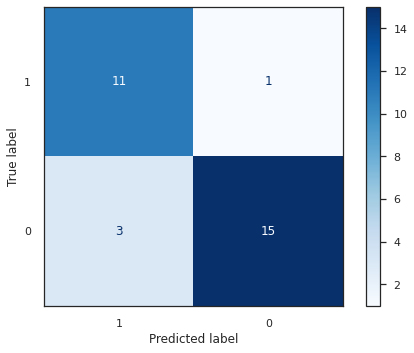

In [81]:
plot_confusion_matrix(model, X_test, y_test, cmap="Blues", labels=[1, 0])

In [82]:
accuracy_score(y_test, y_pred) 

0.8666666666666667

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.79      0.92      0.85        12

    accuracy                           0.87        30
   macro avg       0.86      0.88      0.86        30
weighted avg       0.88      0.87      0.87        30

